# Binary Town 


Consider a town that contains only kids and adults. Each person in this town is associated with a height. Also, the probability of a random person in this town being a kid is $pKid$ and that of being an adult is $pAdult=1-pKid$. 

(a) Simulate 1000 people in this town by taking $pKid=0.4$. Assume that the height of any person is a value from the set $htSet=\{4.9,5.0,5.1,5.2,5.3,5.4,5.5, 5.6, 5.7, 5.8\}$. Also,  the probability that a person has a specific height given that the person is a kid is given by $pHtKid=[0.1, 0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1, 0.1]$ and the probability that a person has a specific height given that the person is an adult is given by $pHtAdult=[0.02, 0.02, 0.02, 0.02, 0.02, 0.18, 0.18, $ $0.18, 0.18, 0.18]$. That is, the probability that a kid has height $5.1$ is $0.1$, the probability that an adult has height $5.4$ is $0.18$ and so on. Show the histograms of heights of both the groups in different colors in a single plot. 

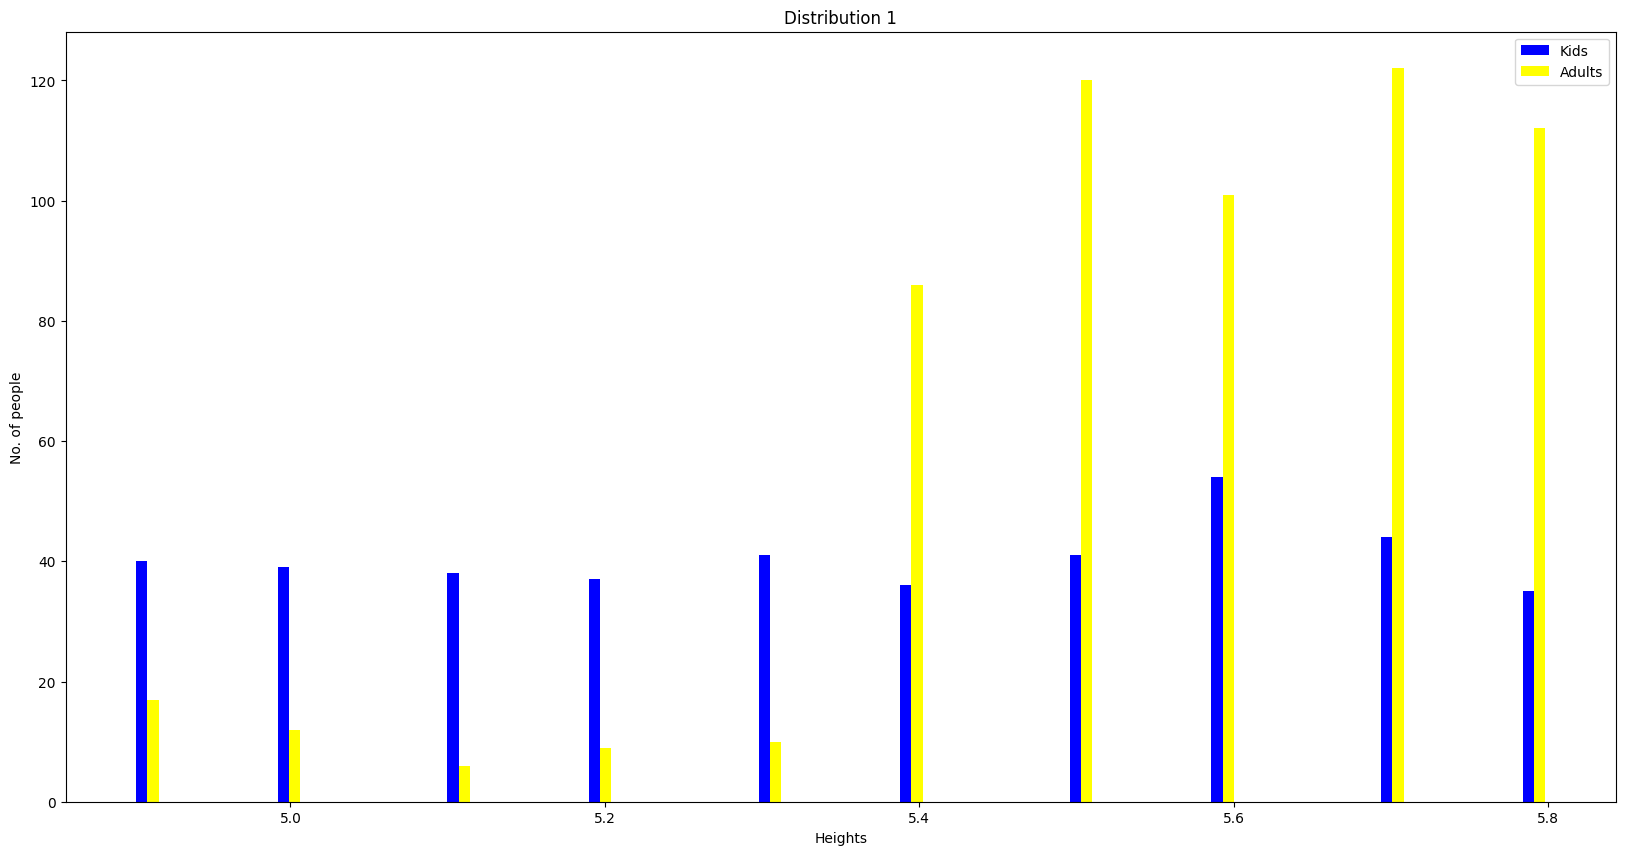

In [55]:
#Simulate 1000 people - kids or adults

import random

from matplotlib import pyplot as plt

L=[1,2,3,4,5,6,7,8,9,10]
heights=[4.9,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8]

def simulation(w_kidlis,w_adultlis,genheights,alis,klis):
    for i in range(1000):
        sel=random.choice(L)
        if (sel<=4):
            h_kid=random.choices(heights,w_kidlis)
            for j in h_kid:
                klis.append(j)
                genheights[i+1]=['k',j]
        else:
            h_adult=random.choices(heights,w_adultlis)
            for k in h_adult:
                alis.append(k)
                genheights[i+1]=['a',k]

#Function to plot a histogram
def histplot(h_kidlis,h_adultlis,num):
    plt.rcParams["figure.figsize"] = (20,10)
    plt.hist([h_kidlis,h_adultlis],color=['Blue','Yellow'],label=['Kids','Adults'],bins=50)
    plt.xlabel("Heights")
    plt.ylabel("No. of people")
    plt.legend(loc="upper right")
    plt.title("Distribution "+str(num))
    plt.show()
    
w1_kid=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
w1_adult=[0.02,0.02,0.02,0.02,0.02,0.18,0.18, 0.18,0.18,0.18]
gen1={}
h_klis1=[]                 #list to store kid heights
h_alis1=[]                 #list to store adult heights
simulation(w1_kid,w1_adult,gen1,h_alis1,h_klis1)
histplot(h_klis1,h_alis1,1)


(b) Implement an agent that classifies each sample generated in part (a) as kid or adult using Bayes' Rule. Measure the accuracy of the classifier in terms of the fraction of correct predictions. You may assume that the agent knows $pKid$, $htSet$, $pHtKid$ and $pHtAdult$.

In [6]:
#agent to classify whether kid or child
def classifying_agent(genheights):
    correctness=0
    for i in range(1,1001):
        x=genheights[i][1]
        ind=heights.index(x)
        wk=w1_kid[ind]
        wa=w1_adult[ind]
        if (wa*0.6 >= wk*0.4):         #prob of being an adult given height is more
            if (genheights[i][0]=='a'):
                correctness+=1
        else:                         #otherwise
            if (genheights[i][0]=='k'):
                correctness+=1
    return correctness/10
    
print("The accuarcy of the classifying agent is:",classifying_agent(gen1))



The accuarcy of the classifying agent is: 73.7


(c) Assume that the height of a person can take on any value in $\mathbb{R}$. Repeat parts (a) and (b) when probability distributions of height given kid and height given adult are given by $f_{h|k}(x) =
\begin{cases}
  1 & \text{if } 4.5 \leq x \leq 5.0 \\
  2 & \text{if } 5.0 \leq x \leq 5.25 \\
  0 & \text{otherwise}
\end{cases}$ and $f_{h|a}(x) =
\begin{cases}
  2 & \text{if } 5.0 \leq x \leq 5.25 \\
  1 & \text{if } 5.25 \leq x \leq 5.75 \\
  0 & \text{otherwise}
\end{cases}$
    
  

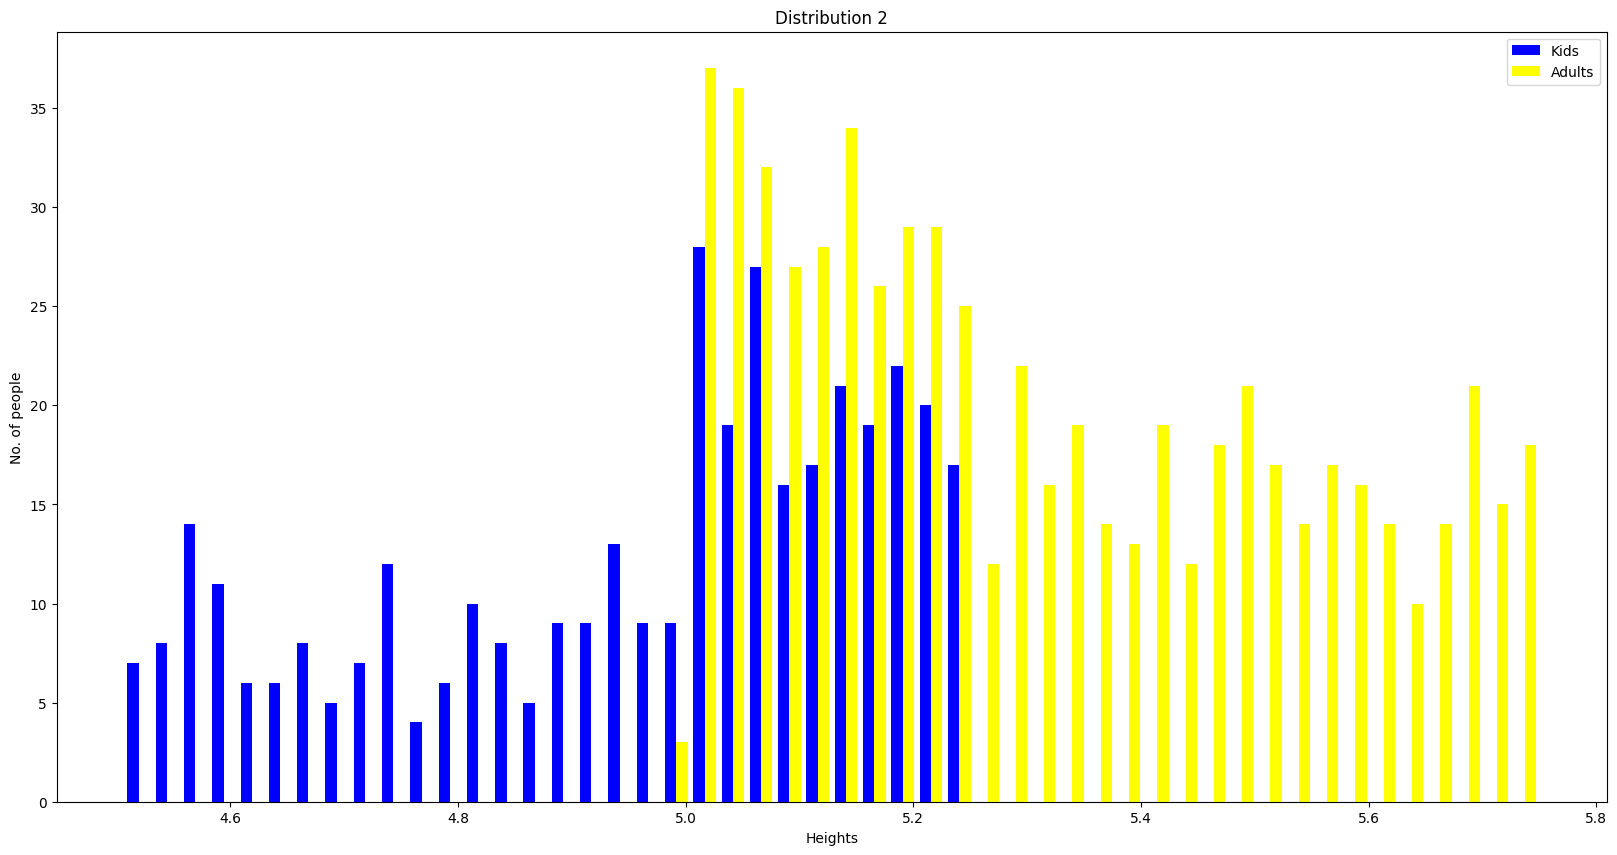

The accuaracy of the agent in this case is: 79.2


In [56]:
import random

#height can take any value in real given the prob distribution function
def simulate_real():
    l1=[1,2,3,4,5,6,7,8,9,10]
    for i in range(1000):
        sel=random.choice(l1)
        if (sel<=4):            #prob of being a kid
            y=random.random()
            if (y<=0.5):
                z=random.uniform(4.5,5)
                h_kidl.append(z)
                gen2[i+1]=['k',z]
            else:
                z=random.uniform(5,5.25)
                h_kidl.append(z)
                gen2[i+1]=['k',z]
        else:                  #prob of being an adult
            y=random.random()
            if (y<=0.5):
                w=random.uniform(5,5.25)
                h_adultl.append(w)
                gen2[i+1]=['a',w]
            else:
                w=random.uniform(5.25,5.75)
                h_adultl.append(w)  
                gen2[i+1]=['a',w]

#function to classify this distribution
def classify2_agent():
    correct=0
    for i in range(1,1001):
        h=gen2[i][1]
        if (h>=4.5 and h<=5.25):
            x=0.5*0.4
        else:
            x=0
        if (h>=5 and h<=5.75):
            y=0.5*0.6
        else:
            y=0
        if (x>=y):
            if (gen2[i][0]=='k'):
                correct+=1
        else:
            if (gen2[i][0]=='a'):
                correct+=1
    return correct/10
        

gen2={}
h_adultl=[]
h_kidl=[]
simulate_real()
histplot(h_kidl,h_adultl,2)

print("The accuaracy of the agent in this case is:",classify2_agent())




(d) Assume that each person in the town has two attributes - height and weight that take on values from $\mathbb{R}$. The 
probability distributions of height given kid and height given adult are $N(\mu_{11},\sigma_{11}^2)$ and $N(\mu_{21},\sigma_{21}^2)$, respectively. Similarly, The 
probability distributions of weight given kid and weight given adult are $N(\mu_{12},\sigma_{12}^2)$ and $N(\mu_{22},\sigma_{22}^2)$, respectively. Here $N(\mu,\sigma^2)$ denotes the Gaussian distribution with mean $\mu$ and standard deviation $\sigma$. Assume that the attributes height and weight are conditionally independent given the category (adult or kid). Simulate 1000 people in this town assuming $pKid=.4$, $\sigma_{11}=\sigma_{21}=1$, $\sigma_{12}=\sigma_{22}=10$, $\mu_{11}=2.5,\mu_{12}=20,\mu_{21}=5,\mu_{22}=40$. Note that you may have to discard a  sample $(x_1,x_2)$ if either $x_1 <0$ or $x_2 <0$. Plot the scatter plot of the samples (height in the X-axis and weight in the Y-axis). 





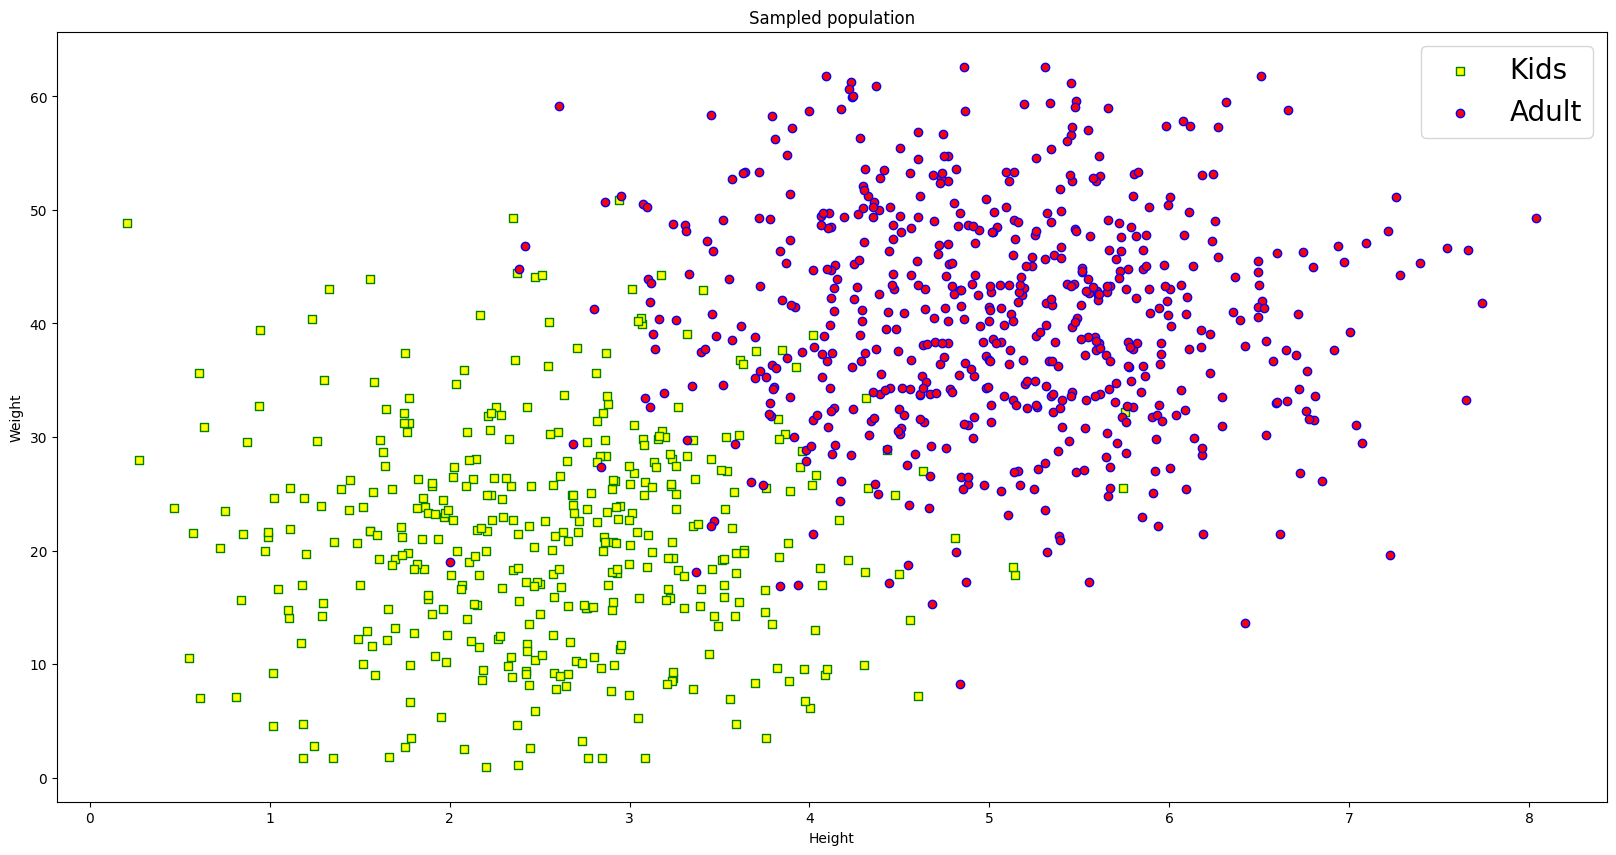

In [41]:
from numpy import random as r
from matplotlib import pyplot as plot


#simulate 1000 people based on gaussian distribution given 
def simulate_sample():
    count=0
    samples={}
    khlis=[]
    kwlis=[]
    ahlis=[]
    awlis=[]
    l=[1,2,3,4,5,6,7,8,9,10]
    while (count<1000):
        sel=random.choice(l)
        if (sel<=4):
            x=r.normal(loc=2.5,scale=1)
            y=r.normal(loc=20,scale=10)
            if (x>0 and y>0):
                khlis.append(x)
                kwlis.append(y)
                hw.append(((x,y),'k'))
                samples[count+1]=['k',x,y]
                count+=1
            else:
                count=count
        else:
            u=r.normal(loc=5,scale=1)
            v=r.normal(loc=40,scale=10)
            if (u>=0 and v>=0):
                ahlis.append(u)
                awlis.append(v)
                hw.append(((u,v),'a'))
                samples[count+1]=['a',u,v]
                count+=1
            else:
                count=count
    return samples,khlis,kwlis,ahlis,awlis

hw=[]                          #list to hold height,weight and category
sm=simulate_sample()

#plotting the scatter plot 
plot.rcParams["figure.figsize"] = (20,10)
plot.scatter(sm[1],sm[2],c='yellow',marker='s',edgecolor="green",label="Kids")
plot.scatter(sm[3],sm[4],c='red',edgecolor="blue",label="Adult")
plot.legend(loc="upper right",fontsize=20)


plot.xlabel("Height")
plot.ylabel("Weight")
plot.title("Sampled population")
plot.show()


(e) Let $S$ denote the set of samples generated in part (d). Given a height-weight pair $(x, y)$, write a function that finds $k$ nearest points in $S$ for each $k \in \{ 5, 10, 15\}$. The distance between $(x, y)$ and $(x_i, y_i)$ is defined as $\sqrt{(x_i-x)^2 + (y_i-y)^2}$. For each $k$, show a scatter plot with $(x, y)$ in one color, its $k$ nearest points in another color and the other points in $S$ in a third color. Also, use the $k$ nearest points of $(x, y)$ and the majority function to classify $(x, y)$ as  belonging to a kid or an adult. 

For 5 neighbours
The selected point is kid category
The actual category of the point is k


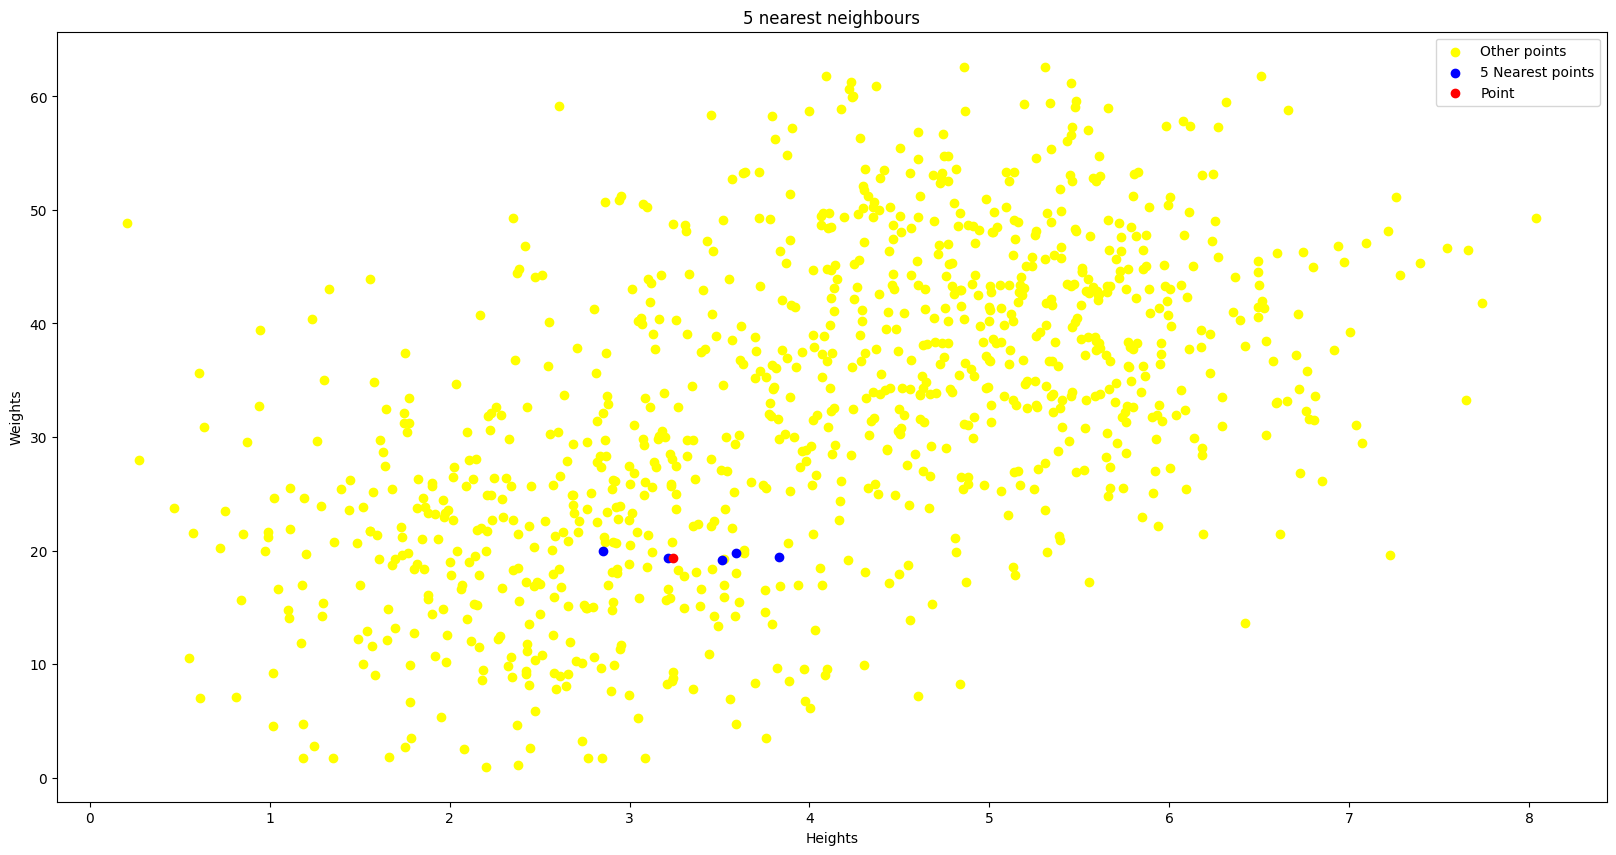

For 10 neighbours
The selected point is kid category
The actual category of the point is k


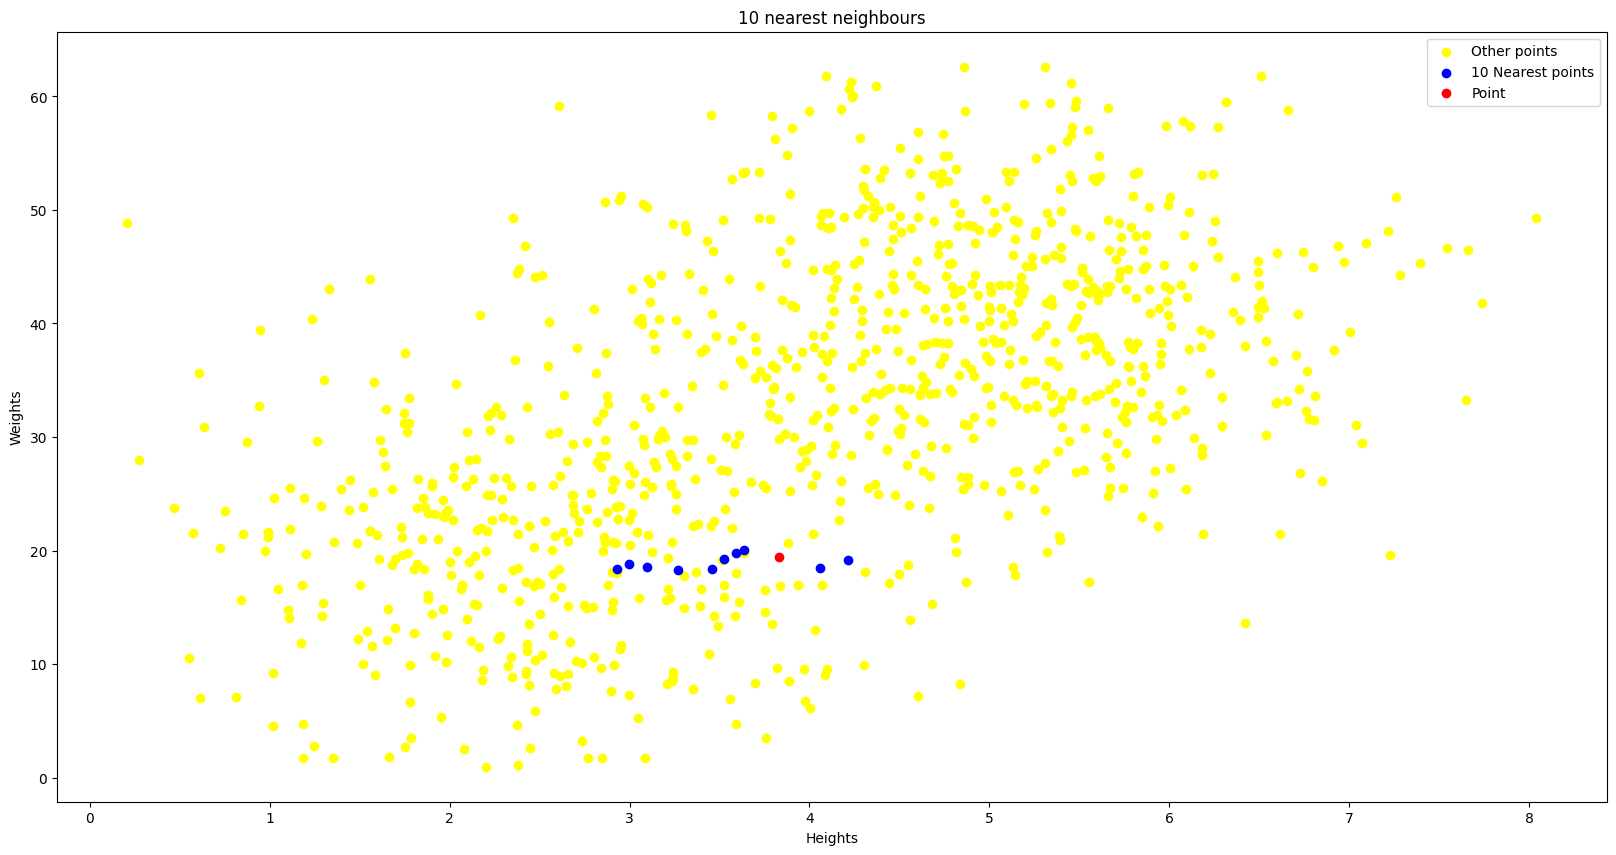

For 15 neighbours
The selected point is kid category
The actual category of the point is k


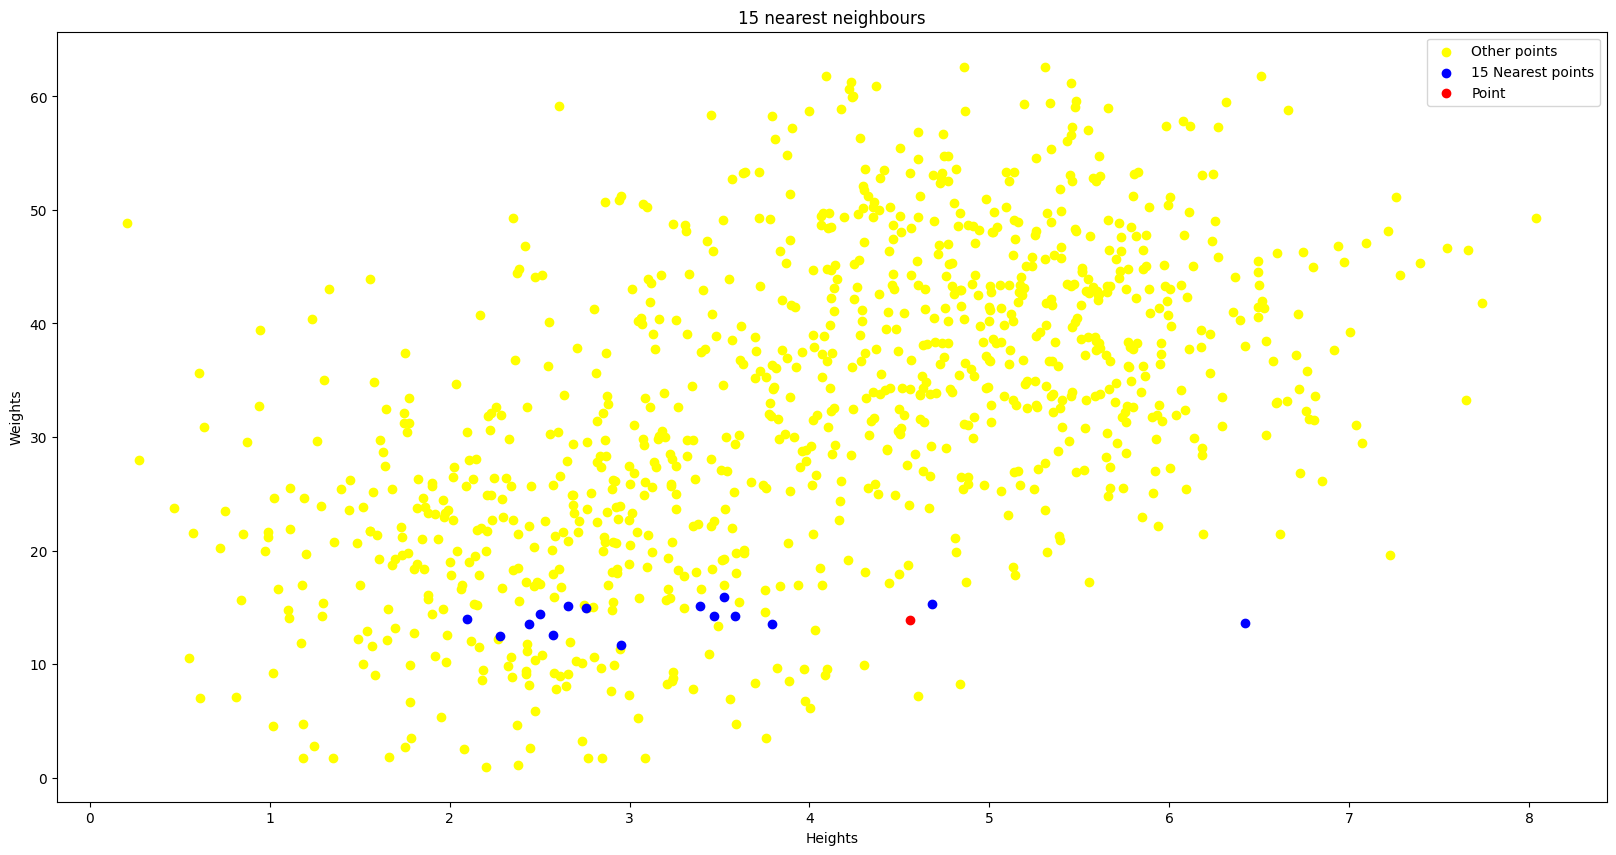

In [54]:
import random
import math
from matplotlib import pyplot as plot

#function to find distance between two points
def distance(u,v):
    return math.dist(u,v)
#     return (((u[0]-v[0])*(10**5))**2)+(((u[1]-v[1])*(10**5))**2)

def nearest_points(n):
    plis=[]
    npheight=[]
    npweight=[]
    category=[]
    hl=[]
    wl=[]
    p=random.choice(hw)
    cp=p[1]
    hw.remove(p)
    for i in range(len(hw)):
        d=distance(hw[i][0],p[0])
        plis.append((d,hw[i]))
    plis.sort()
    for j in range(n):                  #first n nearest points
        npheight.append(plis[j][1][0][0])
        npweight.append(plis[j][1][0][1])
        category.append(plis[j][1][1])
        plis.remove(plis[j])
    print("For", n,"neighbours")
    if (category.count('a')>category.count('k')):
        print("The selected point is adult category")
        print("The actual category of the point is",cp)
    else:
        print("The selected point is kid category")
        print("The actual category of the point is",cp)
    for k in range(len(plis)):
        hl.append(plis[k][1][0][0])
        wl.append(plis[k][1][0][1])
    plot.scatter(hl,wl,c='yellow',label="Other points")
    plot.scatter(npheight,npweight,c='blue',label=str(n)+" Nearest points")
    plot.scatter(p[0][0],p[0][1],c='red',label="Point")
    plot.rcParams["figure.figsize"] = (20,10)
    plot.legend(loc="upper right",fontsize=20)
    plot.xlabel("Heights")
    plot.ylabel("Weights")
    plot.legend(loc="upper right")
    plot.title(str(n)+" nearest neighbours")
    plot.show()

numbers=[5,10,15]
for n in numbers:
    nearest_points(n)



# Optimal First Batting Strategy 

Recall the cricket game simulation that we discussed in Assignment 2. Consider a one-day cricket match. Each
innings consists of 300 balls ignoring no balls, runouts and overthrows. At any point of time, treat the pair of batsmen playing as a single player. That is, there are 10 players, namely, $(1, 2),(2, 3), \ldots ,(10, 11)$. For every player, there are 5 possible shots: $A=\{1, 2, 3, 4, 6\}$. Each of these shots is associated with the risk of the player getting dismissed and this risk varies from player to player. The probabilities of getting dismissed for Player $(1, 2)$ is $pOutMin = [0.01, 0.02, 0.03, 0.1, 0.3]$ and for Player $(10, 11)$ is $pOutMax = [0.1, 0.2, 0.3, 0.5, 0.7]$,  where the ith entry is for the ith action. If there are $w$ wickets in hand, then use the formula 

$$pOut(a, w) = pOutMax(a) + (pOutMin(a) - pOutMax(a)) \times (w- 1)/9)$$ 

to calculate the probabilities of Player $(11-w, 11-w+1)$ getting dismissed for  where $w \in [10]$. Note that $pOut(a, 1)=pOutMin(a)$ and $pOut(a, 10)=pOutMax(a)$. You may assume that if the player does not get out, then the runs corresponding to the shot played is scored.



Let us formulate an optimal strategy for the team batting first. Let $b$ be the number of balls left and $w$ be the wickets in hand. Let $BestScore(b,w)$ be the
maximum expected score under an optimal policy in the remaining $b$ balls with $w$ wickets in hand. Note that no matter what the actual score is, the player should maximize the expected score in the remaining part of the game. Use the boundary conditions $BestScore(0,w)=0$ for each $w$ and $BestScore(b,0)=0$ for each $b$. 

Hint: For $b \in [300]$ and $w \in [10]$, $BestScore(b,w)=\max_a (a+BestScore(b-1,w))$ if the player does not get out in the $b$th ball and $BestScore(b,w)= BestScore(b-1,w-1)$ if the player gets out in the $b$th ball.






(a) Implement an optimal batting-first strategy by computing $BestScore(b,w)$ for each $b \in [300]$ and $w \in [10] \cup \{0\}$ using dynamic programming. Simulate 10 matches and bat according to the optimal policy. Output the optimal action (the recommended shot $BestShot(b,w)$) and the value (total expected score $BestScore(b,w)$ in the remainder of the game) for each pair $(b,w)$ where $b$ is the number of balls left and $w$ is the number of wickets left. Note that $BestShot(b,w)$ denotes the shot to be taken when there are $b$ balls and $w$ wickets left so that $BestScore(b,w)$ is attained. 



In [53]:
import numpy as np
import random

def pOut(a,w):  #fuction to return out prob
    ind=actions.index(a)
    return poutMax[ind]+((poutMin[ind]-poutMax[ind])*(w-1)/9)  

#two 2-D arrays to store best score and shot
best_score=np.zeros((301,11)) 
best_shot=np.zeros((301,11))


poutMin=[0.01,0.02,0.03,0.1,0.3]
poutMax=[0.1,0.2,0.3,0.5,0.7]
actions=[1,2,3,4,6]

for b in range(1,301):
    for w in range(1,11):
        for a in actions:
            op=pOut(a,w)
            expected_score=(op*best_score[b-1][w-1])+((1-op)*(a+best_score[b-1][w]))  #expected value
            if (expected_score > best_score[b][w]):
                best_score[b][w]=expected_score
                best_shot[b][w]=a

print("Best score matrix")
print()
print("         0.00 1.00 2.00 3.00 4.00 5.00 6.00 7.00 8.00 9.00 10.00")
for i in range(best_score.shape[0]):
    print("Ball",i,":",end=' ')
    for j in range(best_score.shape[1]):
        print(format(best_score[i][j], '.2f'),end=' ')
    print()
print()
print("Best shot matrix")
print()
print("         0 1 2 3 4 5 6 7 8 9 10")
for i in range(best_shot.shape[0]):
    print("Ball",i,":",end=' ')
    for j in range(best_shot.shape[1]):
        print(format(best_shot[i][j], '.0f'),end=' ')
    print()




Best score matrix

         0.00 1.00 2.00 3.00 4.00 5.00 6.00 7.00 8.00 9.00 10.00
Ball 0 : 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
Ball 1 : 0.00 2.10 2.19 2.36 2.60 2.87 3.13 3.40 3.67 3.93 4.20 
Ball 2 : 0.00 3.57 4.36 4.64 5.06 5.59 6.14 6.68 7.23 7.77 8.32 
Ball 3 : 0.00 4.60 6.33 6.88 7.44 8.18 9.01 9.85 10.68 11.52 12.36 
Ball 4 : 0.00 5.32 8.06 9.03 9.77 10.66 11.75 12.89 14.03 15.17 16.31 
Ball 5 : 0.00 5.86 9.51 11.08 12.03 13.09 14.36 15.79 17.25 18.71 20.16 
Ball 6 : 0.00 6.28 10.71 12.98 14.21 15.46 16.90 18.57 20.35 22.14 23.93 
Ball 7 : 0.00 6.63 11.71 14.71 16.32 17.77 19.39 21.25 23.33 25.46 27.59 
Ball 8 : 0.00 6.90 12.52 16.27 18.36 20.01 21.83 23.88 26.18 28.66 31.15 
Ball 9 : 0.00 7.12 13.20 17.65 20.29 22.19 24.21 26.47 28.99 31.74 34.60 
Ball 10 : 0.00 7.31 13.75 18.86 22.11 24.31 26.54 29.01 31.76 34.76 37.94 
Ball 11 : 0.00 7.48 14.23 19.92 23.79 26.37 28.81 31.50 34.49 37.75 41.22 
Ball 12 : 0.00 7.63 14.65 20.83 25.35 28.37 31.02 33.94 37.17 4

In [60]:
#Simulating a game

def gameplay(shot):
    balls=300
    wic=10
    score=0
    while (balls!=0 and wic!=0):
        print("Balls left: ",balls,"Current score: ",score)
        a=int(shot[balls][wic])
        if (a==0):
            return score
        outprob=pOut(a,wic)*100
        x=random.randint(1,100)
        if (x <= outprob):
            wic-=1
            print("One person out")
            score+=0
        else:
            score+=a
        balls-=1
    return score


scorelis=[]
s=0
for k in sum(best_shot):
    s+=k
print(s/11)
    
for i in range(10):
    print("Match", i+1)
    scorelis.append(gameplay(best_shot))
    print()
    print("Game over")
    print("-----------------------")
    print()

print(sum(scorelis)/10)
print("The mean of the runs obtained in the optimal strategy is equal to the mean of the best_shot matrix")



442.3636363636364
Match 1
Balls left:  300 Current score:  0
Balls left:  299 Current score:  2
Balls left:  298 Current score:  4
Balls left:  297 Current score:  6
Balls left:  296 Current score:  8
Balls left:  295 Current score:  10
Balls left:  294 Current score:  12
Balls left:  293 Current score:  14
Balls left:  292 Current score:  16
Balls left:  291 Current score:  18
Balls left:  290 Current score:  20
Balls left:  289 Current score:  22
Balls left:  288 Current score:  24
Balls left:  287 Current score:  26
Balls left:  286 Current score:  28
Balls left:  285 Current score:  30
Balls left:  284 Current score:  32
Balls left:  283 Current score:  34
Balls left:  282 Current score:  36
Balls left:  281 Current score:  38
Balls left:  280 Current score:  40
Balls left:  279 Current score:  42
Balls left:  278 Current score:  44
Balls left:  277 Current score:  46
Balls left:  276 Current score:  48
Balls left:  275 Current score:  50
Balls left:  274 Current score:  52
Balls l

(b) What is your observation on the optimal strategy? Is it a good idea to bat slowly during the early part of the game, keeping wickets in hand? This usually allows a steady increase in the scoring rate, and often results in a last-minute rush of runs and wickets during the final part of the innings. Or is it better to score quickly in the early part of the innings? How would the optimal strategy change if there is a chance that a player does not score the runs for a particular shot despite not getting dismissed. Taking $pRunMin = 0.5$, and $pRunMax = 0.8$,  when the player is not getting out, the probability of successfully obtaining the runs for that shot is given by $pRun(w) = pRunMin + (pRunMax - pRunMin) \times ((w - 1)/9).$

In [ ]:
Yes it is  agood idea to bat slowly in the beginning and keep wickets in  hand as seen from  the best shot matrix

In [23]:
#probability of scoring a run given the person is not out
def pRun(w):
    return 0.5+((0.3)*((w-1)/9))


bestscore=np.zeros((301,11))
bestshot=np.zeros((301,11))

#when there is probability associated with scoring a run
for ba in range(1,301):
    for wi in range(1,11):
        probrun=pRun(wi)
        for a in actions:
            probout=pOut(a,wi)            
            expected_score=(probout*(bestscore[ba-1][wi-1]))+((1-probout)*((probrun*(a+bestscore[ba-1][wi]))+((1-probrun)*(bestscore[ba-1][wi]))))
            if expected_score > bestscore[ba][wi]:
                bestscore[ba][wi]=expected_score
                bestshot[ba][wi]=a

print("Best score matrix")
print()
for i in range(bestscore.shape[0]):
    for j in range(bestscore.shape[1]):
        print(format(bestscore[i][j], '.2f'),end=' ')
    print()

print("Best shot matrix")
print()
for i in range(bestshot.shape[0]):
    for j in range(bestshot.shape[1]):
        print(format(bestshot[i][j], '.0f'),end=' ')
    print()
    


Best score matrix

0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 1.05 1.17 1.33 1.56 1.82 2.09 2.38 2.69 3.02 3.36 
0.00 1.78 2.30 2.60 3.00 3.50 4.05 4.63 5.26 5.92 6.62 
0.00 2.30 3.33 3.82 4.37 5.05 5.87 6.76 7.70 8.71 9.77 
0.00 2.66 4.22 5.00 5.69 6.55 7.57 8.76 10.03 11.38 12.81 
0.00 2.93 4.97 6.10 6.97 7.99 9.21 10.63 12.22 13.93 15.74 
0.00 3.14 5.58 7.12 8.21 9.38 10.80 12.44 14.30 16.35 18.56 
0.00 3.31 6.09 8.05 9.40 10.73 12.33 14.21 16.33 18.68 21.26 
0.00 3.45 6.51 8.87 10.54 12.04 13.81 15.92 18.31 20.97 23.88 
0.00 3.56 6.85 9.59 11.61 13.33 15.25 17.57 20.23 23.20 26.47 
0.00 3.65 7.13 10.23 12.61 14.58 16.66 19.18 22.11 25.40 29.02 
0.00 3.74 7.38 10.78 13.53 15.78 18.05 20.73 23.94 27.55 31.54 
0.00 3.82 7.60 11.26 14.37 16.94 19.41 22.26 25.71 29.65 34.02 
0.00 3.88 7.79 11.67 15.14 18.03 20.74 23.77 27.44 31.70 36.46 
0.00 3.95 7.97 12.03 15.83 19.07 22.03 25.25 29.12 33.71 38.87 
0.00 4.00 8.12 12.35 16.46 20.05 23.29 26.71 30.78 35.67 41.23 
0.00 

In [26]:
print("In this case the maximum expected score decreases")

score2lis=[]
for i in range(10):
    print("Match", i+1)
    score2lis.append(gameplay(bestshot))
    print()
    print("Game over")
    print("-----------------------")
    print()

print("The average is:",sum(score2lis)/10)


In this case the maximum expected score decreases
Match 1
Balls left:  300 Current score:  0
Balls left:  299 Current score:  2
Balls left:  298 Current score:  4
Balls left:  297 Current score:  6
Balls left:  296 Current score:  8
Balls left:  295 Current score:  10
Balls left:  294 Current score:  12
Balls left:  293 Current score:  14
Balls left:  292 Current score:  16
Balls left:  291 Current score:  18
Balls left:  290 Current score:  20
Balls left:  289 Current score:  22
Balls left:  288 Current score:  24
Balls left:  287 Current score:  26
Balls left:  286 Current score:  28
Balls left:  285 Current score:  30
Balls left:  284 Current score:  32
Balls left:  283 Current score:  34
Balls left:  282 Current score:  36
Balls left:  281 Current score:  38
Balls left:  280 Current score:  40
Balls left:  279 Current score:  42
Balls left:  278 Current score:  44
Balls left:  277 Current score:  46
Balls left:  276 Current score:  48
Balls left:  275 Current score:  50
Balls left: